  States  SLEEP_L1__54  SLEEP_L3__54  SLEEP_E2__54  SLEEP_119_2__54   
0   WAKE           246           283           200              223  \
1   NREM           265           299           272              266   
2    REM           251           245           142              152   

   SLEEP_328A_3__54  SLEEP_132_1__54  SLEEP_132_2__54  
0               217              236              268  
1               272              248              330  
2                 0              152              245  


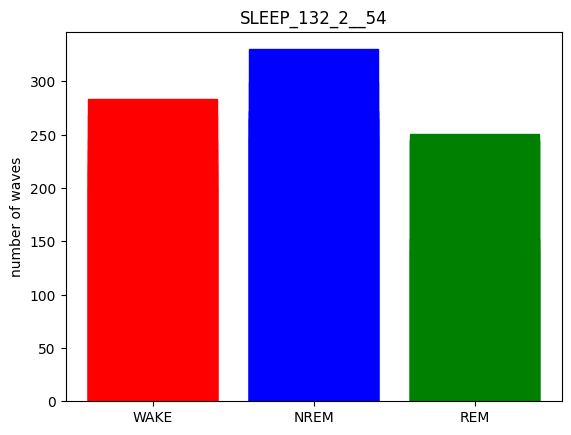

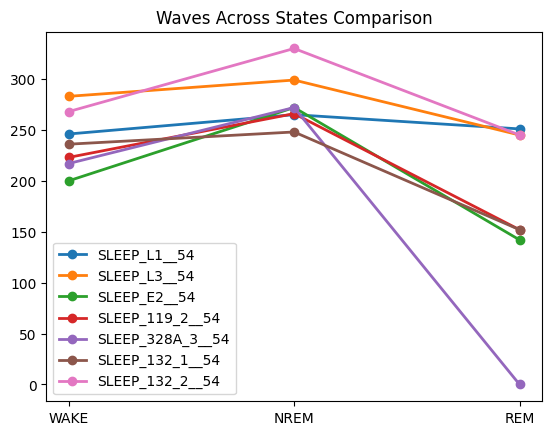

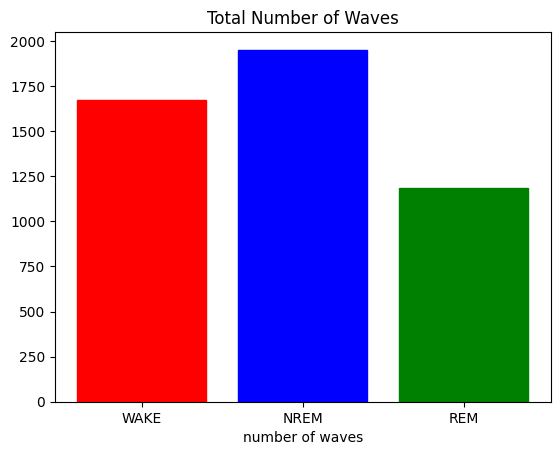

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

states = ['WAKE', 'NREM', 'REM']
mice = []
#0 -> Wake, 1 -> NREM, 2 -> REM
table = []
for i in range(7):
    table.append([])
    for j in range(3):
        table[i].append(0)
#0 -> L1, 1 -> L3, 2 -> E2, 3 -> 119_2, 4 -> 328A_3, 5 -> 132_1, 6 -> 132_2

#(because sometimes data is missing) compares names, if 1 then they are the same mouse. If not 1, the new mouse.
def similar(a , b):
    for state in states:
        if state in str(a):
            a = a.replace(state, '')
        if state in str(b):
            b = b.replace(state, '')
    s = SequenceMatcher(None, a, b)
    mice.append(a)
    #print(s.ratio())
    if s.ratio() == 1:
        return True
    else:
        return False
data = (
'SLEEP_L1_NREM_54', 
'SLEEP_L1_REM_54',
'SLEEP_L1_WAKE_54',
'SLEEP_L3_NREM_54', 
'SLEEP_L3_REM_54',
'SLEEP_L3_WAKE_54',
'SLEEP_E2_NREM_54', 
'SLEEP_E2_REM_54',
'SLEEP_E2_WAKE_54',
'SLEEP_119_2_NREM_54', 
'SLEEP_119_2_REM_54',
'SLEEP_119_2_WAKE_54',
'SLEEP_328A_3_NREM_54', 
'SLEEP_328A_3_WAKE_54',
'SLEEP_132_1_NREM_54', 
'SLEEP_132_1_REM_54',
'SLEEP_132_1_WAKE_54',
'SLEEP_132_2_NREM_54', 
'SLEEP_132_2_REM_54',
'SLEEP_132_2_WAKE_54',
)
j = 0
for i, file in enumerate(data):
    filename = file.strip()
    df = pd.read_csv(Path(f"D:\\{filename}\\stage05_channel-wave_characterization\\velocity_local\\wavefronts_velocity_local.csv"), usecols=['wavefronts_id'])
    index = df.tail(1).index.item() #grabs last index's value in file
    num = df.at[index, 'wavefronts_id']
    if 'WAKE' in str(filename):
        table[j][0] = num
    elif 'NREM' in str(filename):
        table[j][1] = num
    elif 'REM' in str(filename):
        table[j][2] = num
    #print(f"{filename} {num}")
    if i + 1 < len(data): #if not similar, goes to next list in list
        if not similar(data[i], data[i+1]):
            j += 1
df = pd.DataFrame({'States': states})
mice_unique = []
[mice_unique.append(item) for item in mice if item not in mice_unique]
for index, column in enumerate(table):
    df.insert(index, mice_unique[index], table[index], True)
state = df.pop('States')
df.insert(0, state.name, state)
df.to_csv(Path("D:\\Sandro_Code\\number_of_waves\\number_of_waves.csv"), index = False, mode='w+')
print(df)

#individual bar graphs
for mouse in mice_unique:
    y = ['WAKE', 'NREM', 'REM']
    x = df[mouse]
    bgraph = plt.bar(y,x)
    bgraph[0].set_color('red')
    bgraph[1].set_color('blue')
    bgraph[2].set_color('green')
    plt.ylabel('number of waves')
    plt.title(mouse)
    plt.savefig(f"D:\\Sandro_Code\\number_of_waves\\{mouse}_number_of_waves.pdf")
#plt.clf()
plt.show()


#line plot
for mouse in mice_unique:
    y = ['WAKE', 'NREM', 'REM']
    x = df[mouse]
    plt.plot(y, x, label=mouse, marker='o', linewidth=2)
plt.legend()
plt.title('Waves Across States Comparison')
plt.savefig('D:\\Sandro_Code\\number_of_waves\\number_of_waves_comparison.pdf')
plt.show()
#plt.clf()

#total bar graph
df.pop('States')
df_total = df.sum(axis = 1) #sum up rows of table
y = ['WAKE', 'NREM', 'REM']
x = df_total
bgraph= plt.bar(y,x)
bgraph[0].set_color('red')
bgraph[1].set_color('blue')
bgraph[2].set_color('green')
plt.title('Total Number of Waves')
plt.xlabel('number of waves')
plt.savefig('D:\\Sandro_Code\\number_of_waves\\total_number_of_waves.pdf')
#plt.clf()
plt.show()

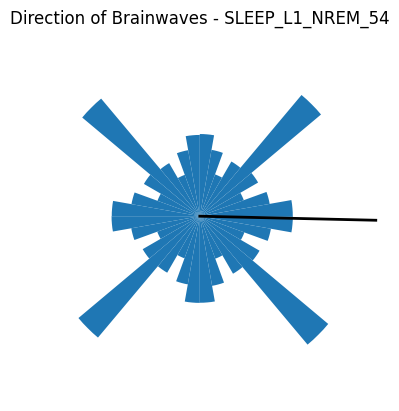

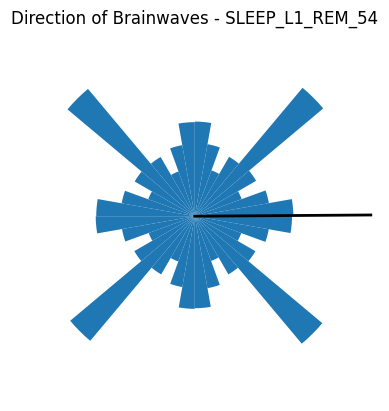

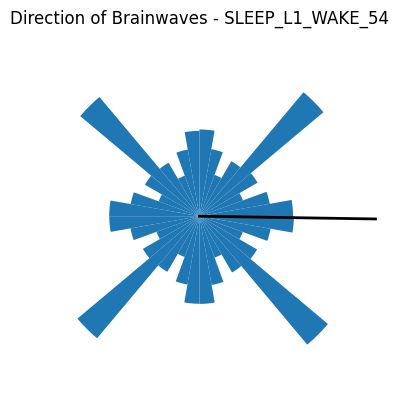

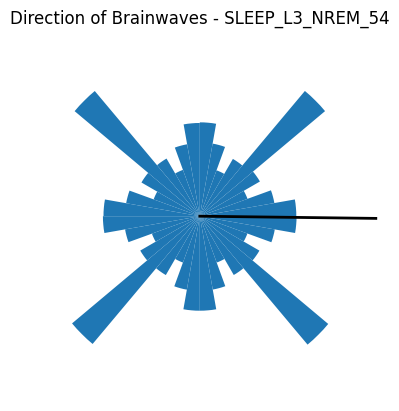

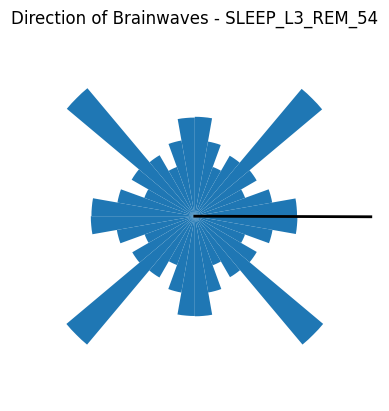

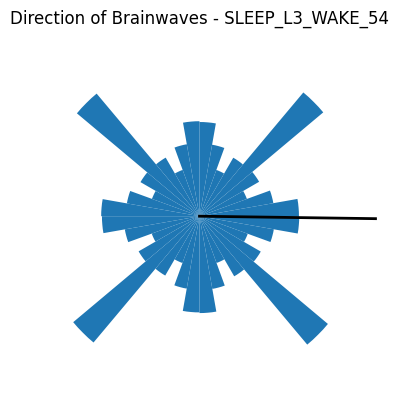

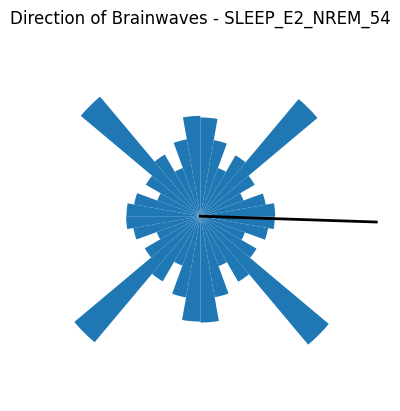

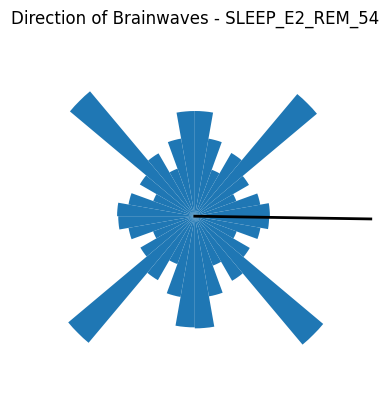

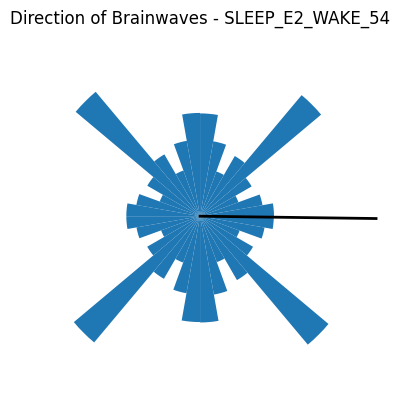

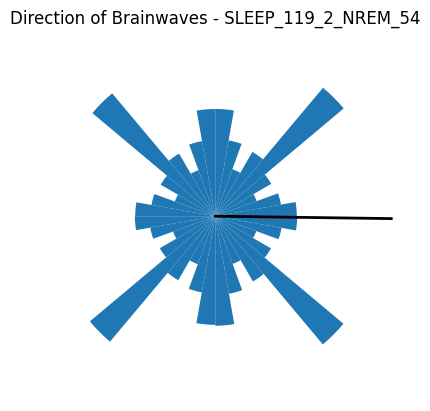

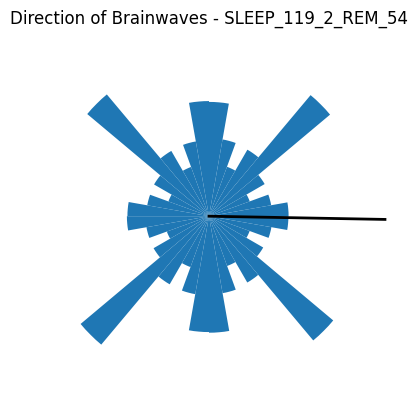

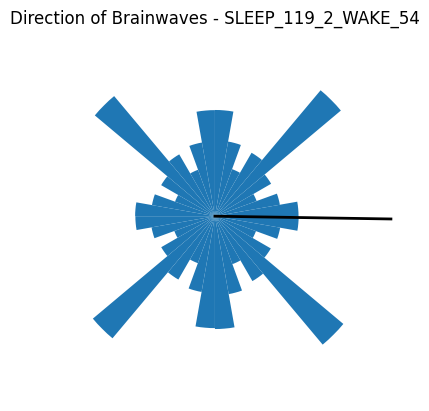

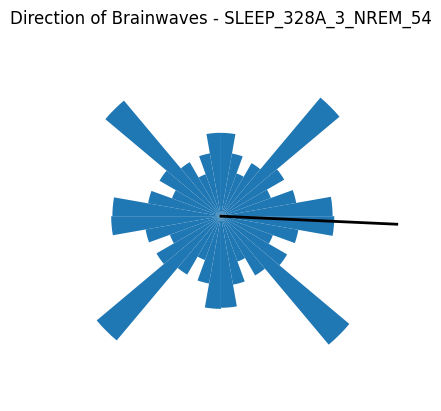

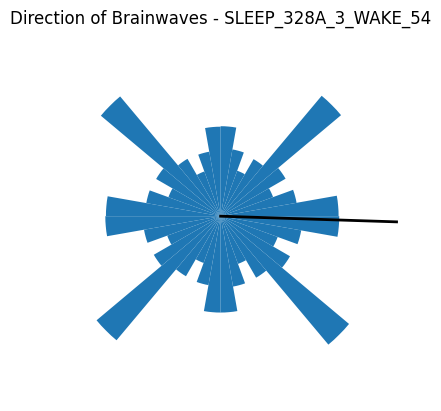

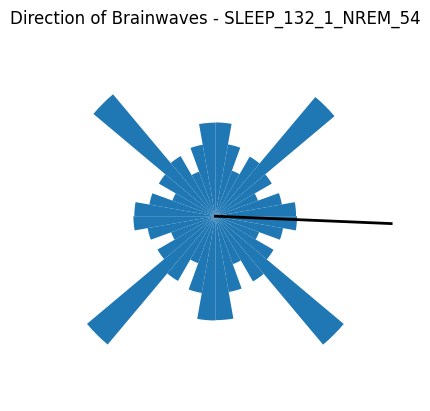

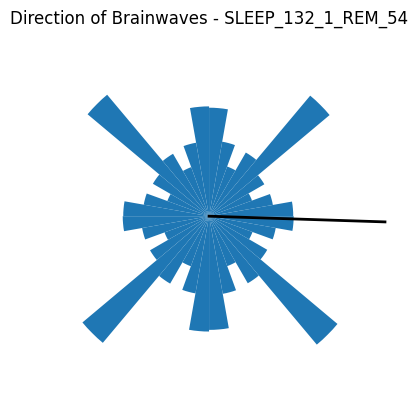

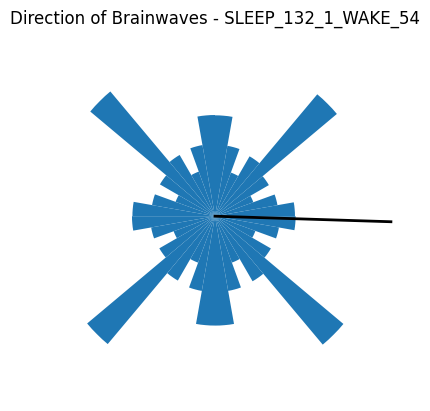

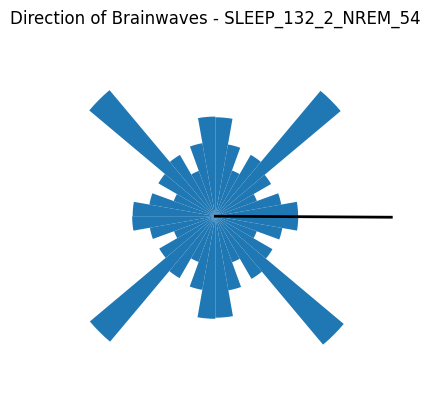

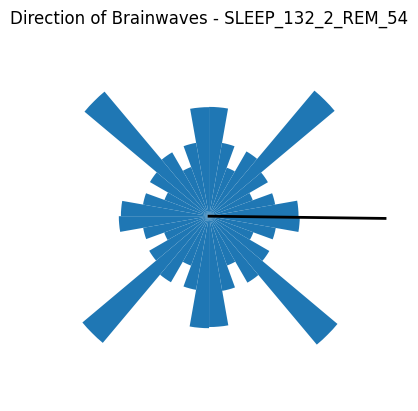

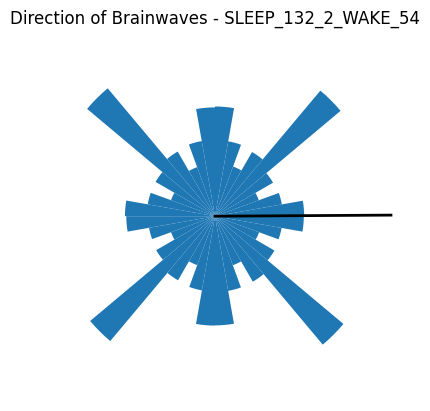

In [3]:
data = (
'SLEEP_L1_NREM_54', 
'SLEEP_L1_REM_54',
'SLEEP_L1_WAKE_54',
'SLEEP_L3_NREM_54', 
'SLEEP_L3_REM_54',
'SLEEP_L3_WAKE_54',
'SLEEP_E2_NREM_54', 
'SLEEP_E2_REM_54',
'SLEEP_E2_WAKE_54',
'SLEEP_119_2_NREM_54', 
'SLEEP_119_2_REM_54',
'SLEEP_119_2_WAKE_54',
'SLEEP_328A_3_NREM_54', 
'SLEEP_328A_3_WAKE_54',
'SLEEP_132_1_NREM_54', 
'SLEEP_132_1_REM_54',
'SLEEP_132_1_WAKE_54',
'SLEEP_132_2_NREM_54', 
'SLEEP_132_2_REM_54',
'SLEEP_132_2_WAKE_54',
)

import pandas as pd
import numpy as np

for k, file in enumerate(data):
    filename = file.strip()
    df = pd.read_csv(Path(f"D:\\{filename}\\stage05_channel-wave_characterization\\direction_local\\wavefronts_direction_local.csv"))
    directionX = df['direction_local_x']
    directionY = df['direction_local_y']
    angles = np.arctan2(directionY, directionX)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.hist(angles, bins=36, range=(-np.pi, np.pi), density=True)
    ax.grid(False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title(f'Direction of Brainwaves - {filename}')
    
   # Calculate the average angle
    average_angle = np.mean(angles)
    
    # Plot the average line as a black solid line
    ax.plot([average_angle, average_angle], [0, ax.get_ylim()[1]], color='black', linewidth=2)
    
    # Remove the outer circle
    ax.spines['polar'].set_visible(False)
    
    plt.show()
    
    

843


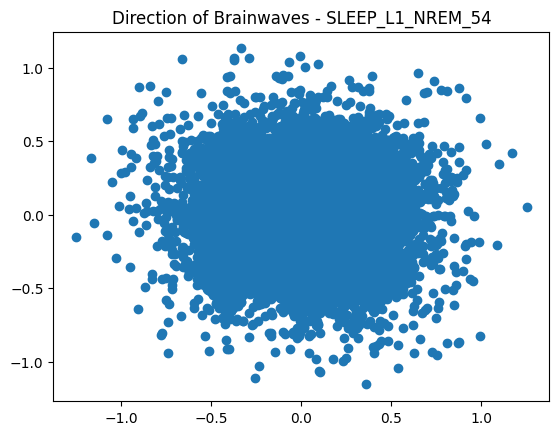

238


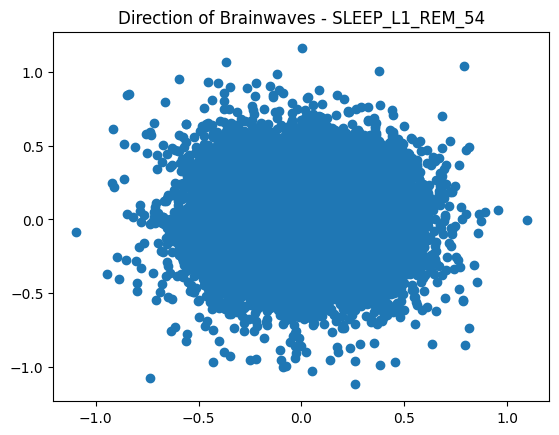

872


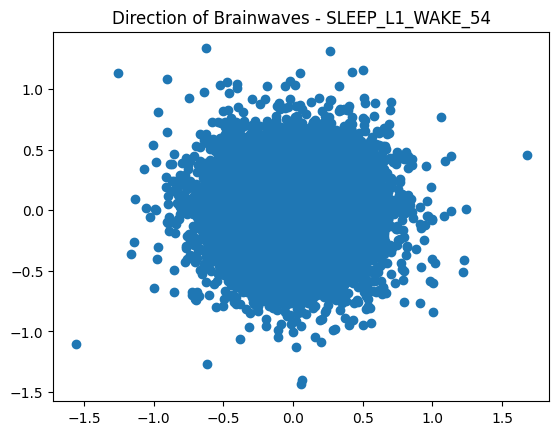

92


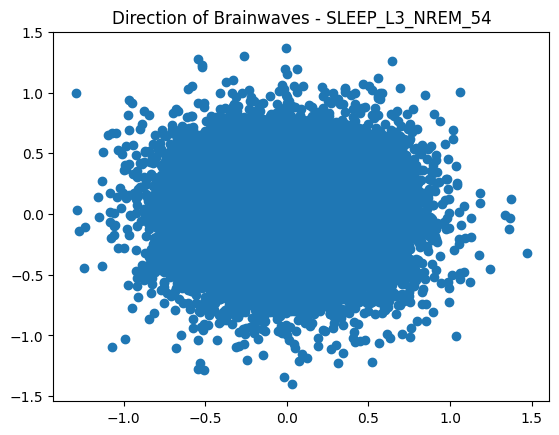

-23


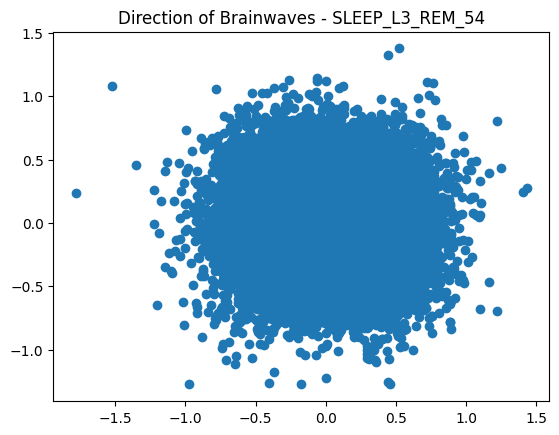

75


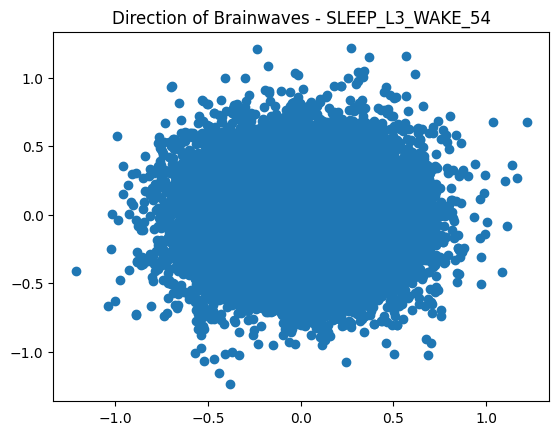

22


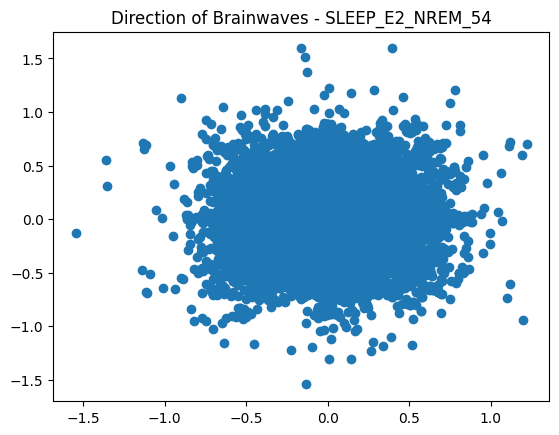

-72


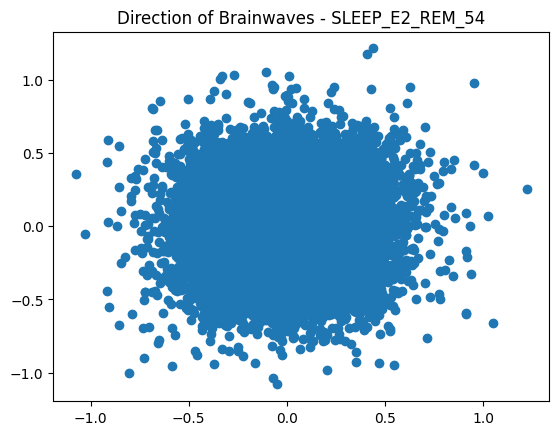

-340


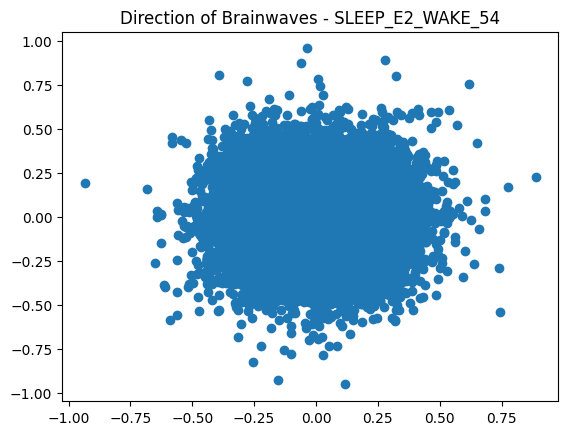

334


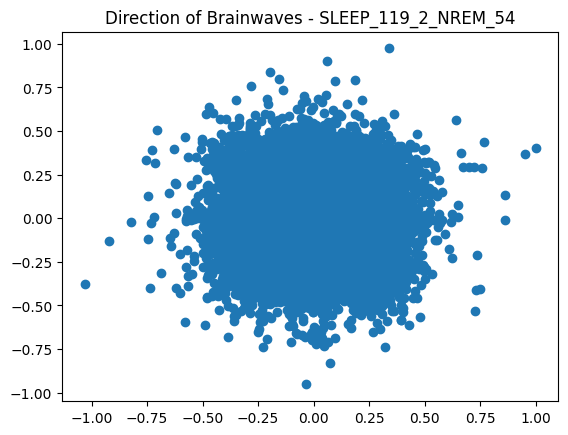

0


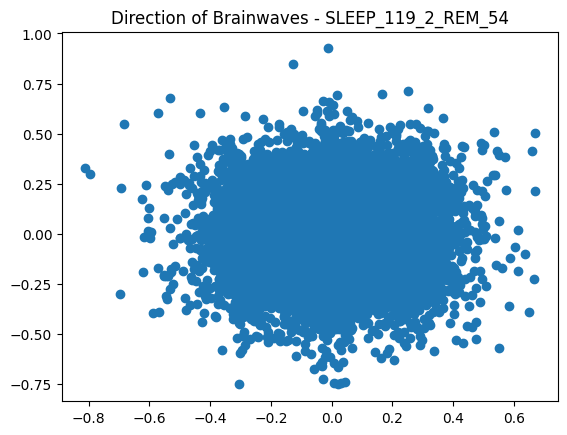

531


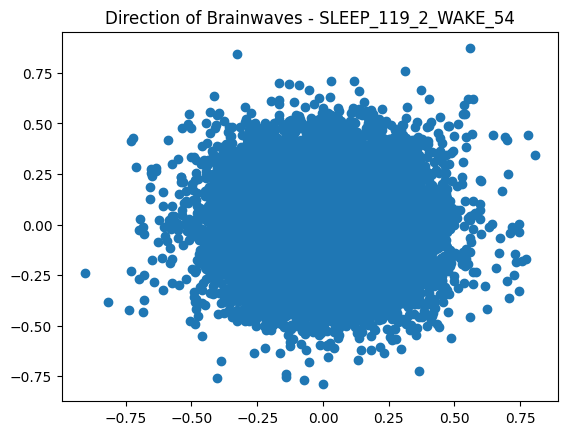

348


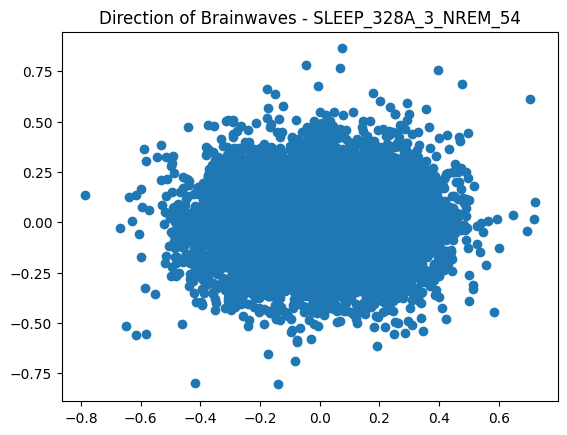

184


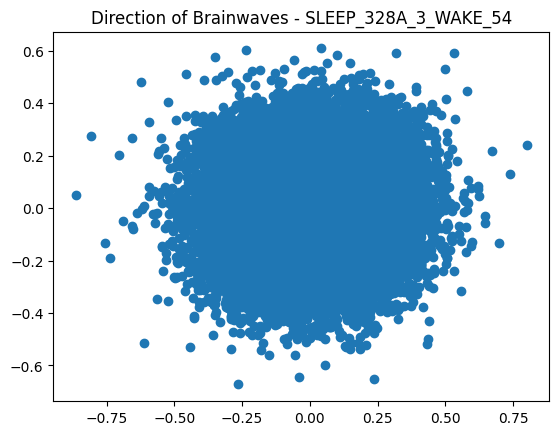

-142


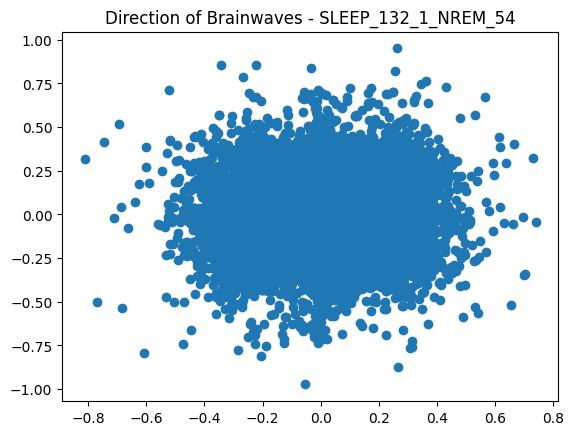

-133


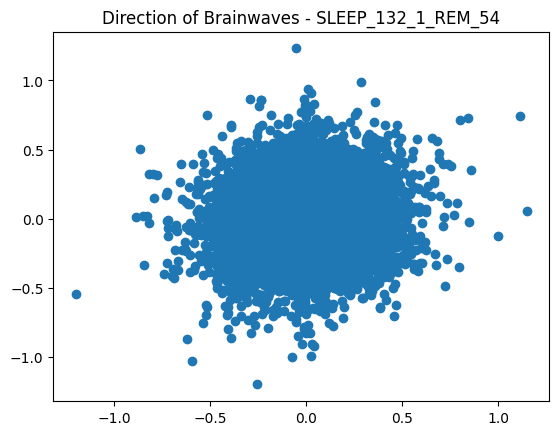

-294


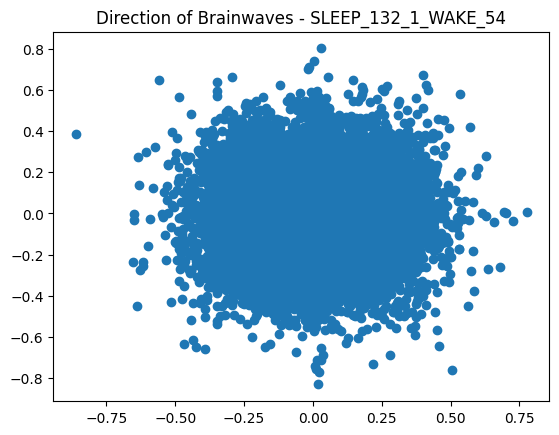

0


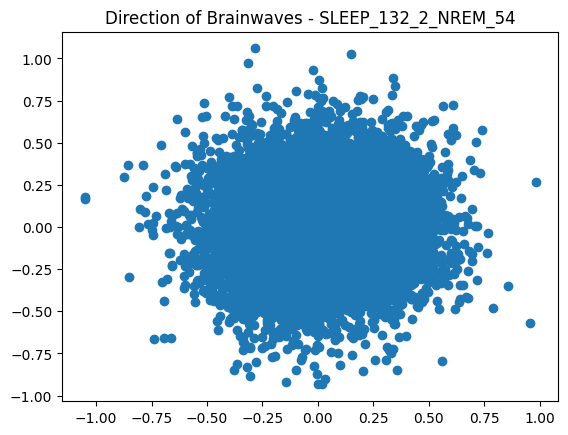

-59


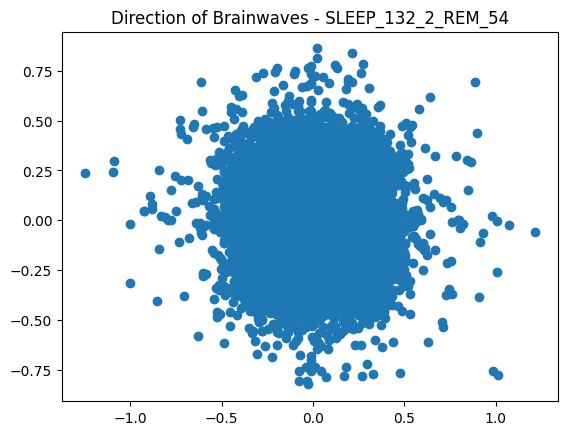

113


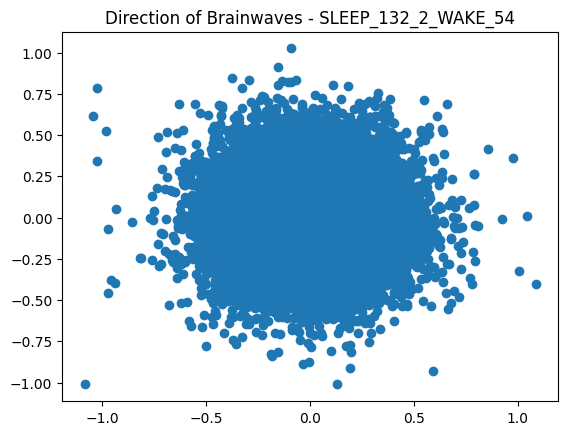

In [4]:
data = (
'SLEEP_L1_NREM_54', 
'SLEEP_L1_REM_54',
'SLEEP_L1_WAKE_54',
'SLEEP_L3_NREM_54', 
'SLEEP_L3_REM_54',
'SLEEP_L3_WAKE_54',
'SLEEP_E2_NREM_54', 
'SLEEP_E2_REM_54',
'SLEEP_E2_WAKE_54',
'SLEEP_119_2_NREM_54', 
'SLEEP_119_2_REM_54',
'SLEEP_119_2_WAKE_54',
'SLEEP_328A_3_NREM_54', 
'SLEEP_328A_3_WAKE_54',
'SLEEP_132_1_NREM_54', 
'SLEEP_132_1_REM_54',
'SLEEP_132_1_WAKE_54',
'SLEEP_132_2_NREM_54', 
'SLEEP_132_2_REM_54',
'SLEEP_132_2_WAKE_54',
)

import pandas as pd
import numpy as np

for k, file in enumerate(data):
    filename = file.strip()
    df = pd.read_csv(Path(f"D:\\{filename}\\stage05_channel-wave_characterization\\direction_local\\wavefronts_direction_local.csv"))
    directionX = 'direction_local_x'
    directionY = 'direction_local_y'
    delta_x = df[directionX].diff()
    delta_y= df[directionY].diff()
    plt.scatter(delta_x, delta_y)
    plt.title(f'Direction of Brainwaves - {filename}')
    print(int(df['direction_local_x'].sum()))
    
 
    
    plt.show()

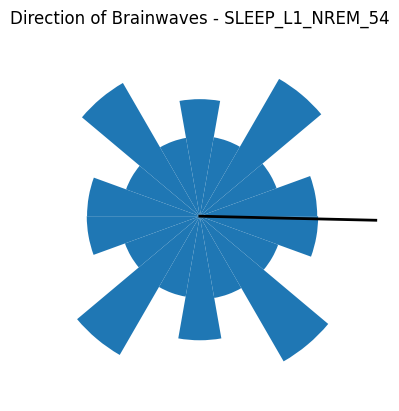

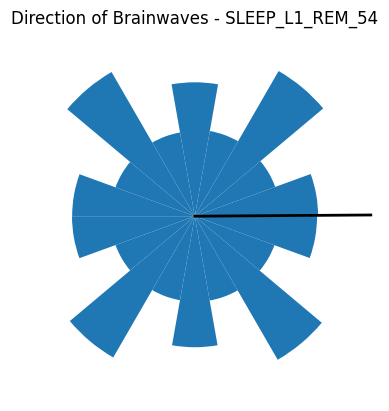

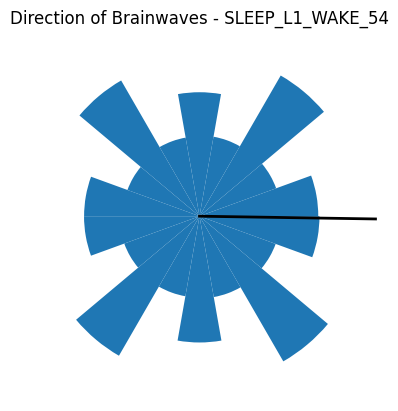

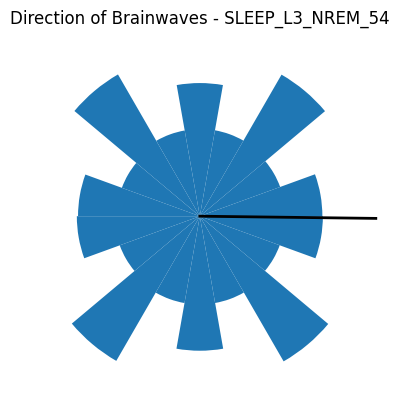

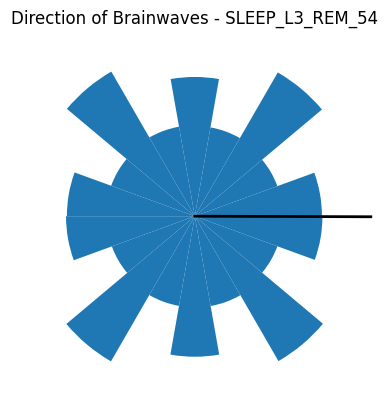

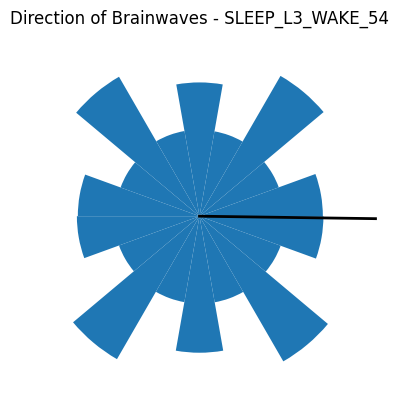

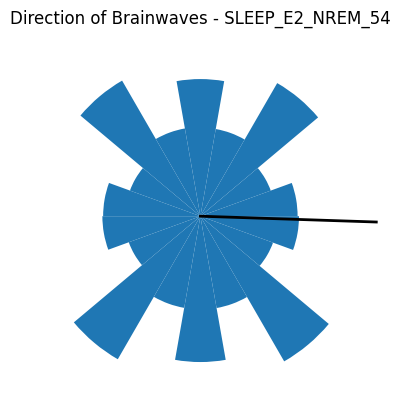

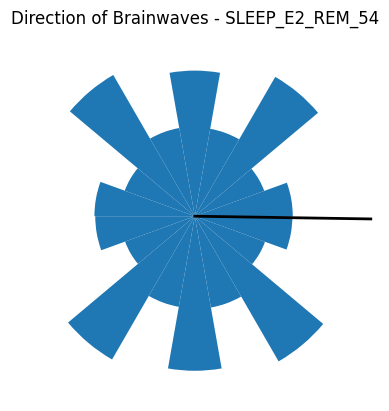

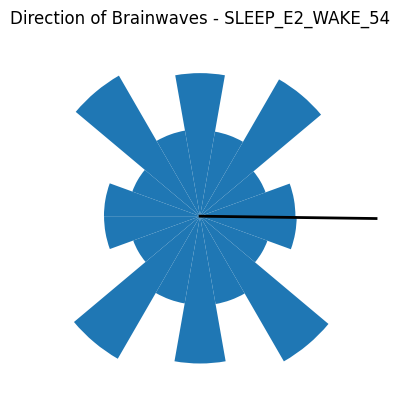

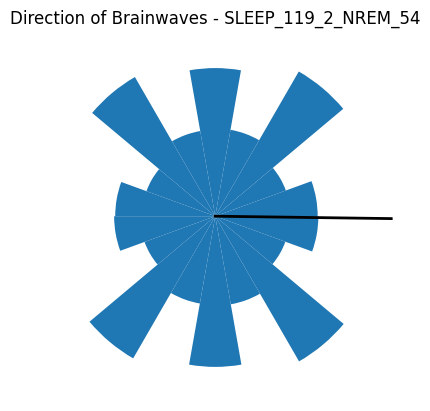

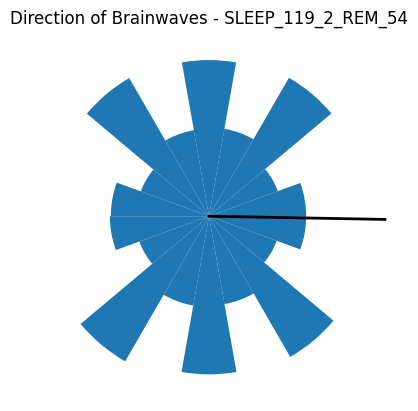

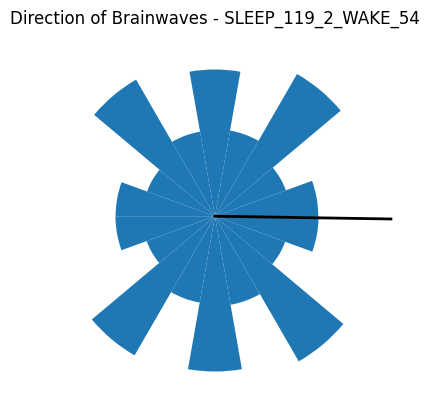

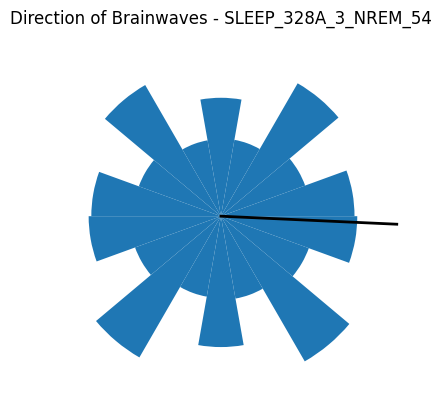

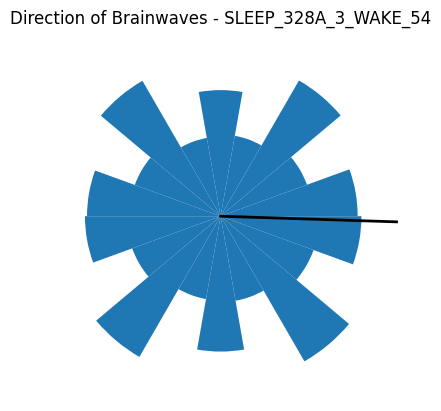

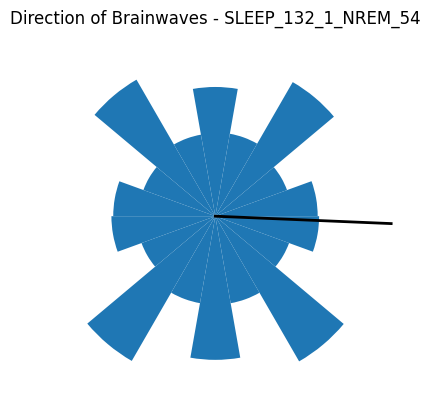

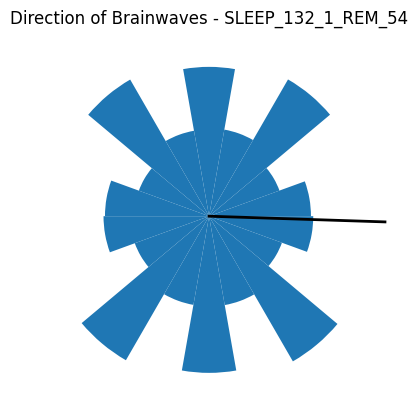

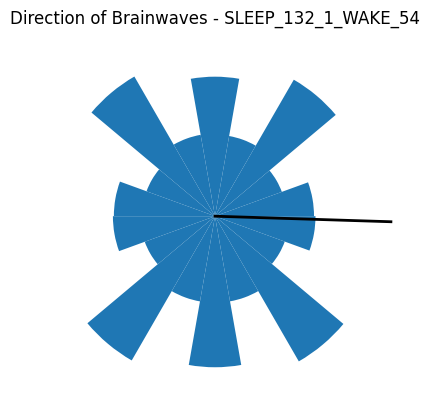

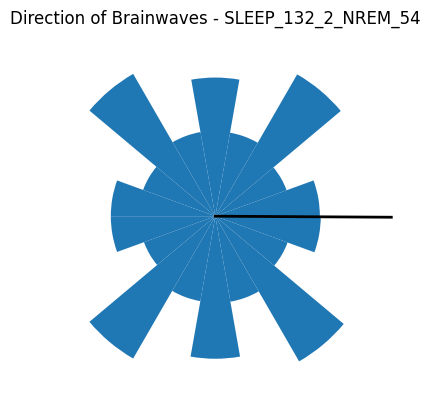

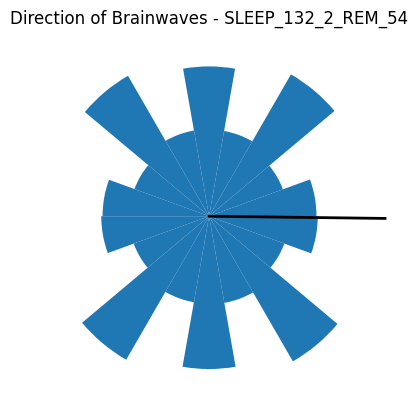

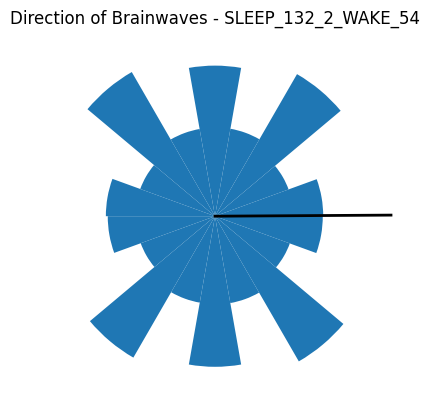

In [5]:
data = (
'SLEEP_L1_NREM_54', 
'SLEEP_L1_REM_54',
'SLEEP_L1_WAKE_54',
'SLEEP_L3_NREM_54', 
'SLEEP_L3_REM_54',
'SLEEP_L3_WAKE_54',
'SLEEP_E2_NREM_54', 
'SLEEP_E2_REM_54',
'SLEEP_E2_WAKE_54',
'SLEEP_119_2_NREM_54', 
'SLEEP_119_2_REM_54',
'SLEEP_119_2_WAKE_54',
'SLEEP_328A_3_NREM_54', 
'SLEEP_328A_3_WAKE_54',
'SLEEP_132_1_NREM_54', 
'SLEEP_132_1_REM_54',
'SLEEP_132_1_WAKE_54',
'SLEEP_132_2_NREM_54', 
'SLEEP_132_2_REM_54',
'SLEEP_132_2_WAKE_54',
)

import pandas as pd
import numpy as np

for k, file in enumerate(data):
    filename = file.strip()
    df = pd.read_csv(Path(f"D:\\{filename}\\stage05_channel-wave_characterization\\direction_local\\wavefronts_direction_local.csv"))
    directionX = df['direction_local_x']
    directionY = df['direction_local_y']
    angles = np.arctan2(directionY, directionX)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.hist(angles, bins=36, range=(-2*np.pi, 2*np.pi), density=True)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)  # Remove the radial grid lines
    plt.title(f'Direction of Brainwaves - {filename}')
    
   # Calculate the average angle
    average_angle = np.mean(angles)
    
    # Plot the average line as a black solid line
    plt.plot([average_angle, average_angle], [0, ax.get_ylim()[1]], color='black', linewidth=2)
    
    # Remove the outer circle
    ax.spines['polar'].set_visible(False)
    
        
    
    plt.show()

In [6]:
data = (
'SLEEP_L1_NREM_54', 
'SLEEP_L1_REM_54',
'SLEEP_L1_WAKE_54',
'SLEEP_L3_NREM_54', 
'SLEEP_L3_REM_54',
'SLEEP_L3_WAKE_54',
'SLEEP_E2_NREM_54', 
'SLEEP_E2_REM_54',
'SLEEP_E2_WAKE_54',
'SLEEP_119_2_NREM_54', 
'SLEEP_119_2_REM_54',
'SLEEP_119_2_WAKE_54',
'SLEEP_328A_3_NREM_54', 
'SLEEP_328A_3_WAKE_54',
'SLEEP_132_1_NREM_54', 
'SLEEP_132_1_REM_54',
'SLEEP_132_1_WAKE_54',
'SLEEP_132_2_NREM_54', 
'SLEEP_132_2_REM_54',
'SLEEP_132_2_WAKE_54',
)

import pandas as pd
import numpy as np

for a, file in enumerate(data):
    filename = file.strip()
    df = pd.read_csv(Path(f"D:\\{filename}\\stage05_channel-wave_characterization\\velocity_local\\wavefronts_velocity_local.csv"))
    sorts = df.groupby('velocity_local_unit')
    for sort in sorts:
        print(sorts.mean())
    


                     Unnamed: 0  velocity_local   channel_id  wavefronts_id
velocity_local_unit                                                        
mm/s                   674818.0    3.244533e+09  8532.622969     132.240242
                     Unnamed: 0  velocity_local   channel_id  wavefronts_id
velocity_local_unit                                                        
mm/s                   641509.0    1.626837e+09  8645.214872     129.015269
                     Unnamed: 0  velocity_local   channel_id  wavefronts_id
velocity_local_unit                                                        
mm/s                   740543.5    1.740728e+09  8565.652497     117.166396
                     Unnamed: 0  velocity_local   channel_id  wavefronts_id
velocity_local_unit                                                        
mm/s                   888315.0    1.305113e+09  8202.656115     156.669477
                     Unnamed: 0  velocity_local   channel_id  wavefronts_id
velocity_loc